In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('data/gapminder_lifeexpectancy.xlsx', index_col=0)
df.head()

,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,1809.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [3]:
df.shape

(260, 217)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, Abkhazia to South Sudan
Columns: 217 entries, 1800.0 to 2016.0
dtypes: float64(217)
memory usage: 442.8+ KB


In [5]:
df.isna().sum()

1800.0    59
1801.0    59
1802.0    59
1803.0    59
1804.0    59
          ..
2012.0    52
2013.0    52
2014.0    52
2015.0    52
2016.0    52
Length: 217, dtype: int64

In [6]:
dfomv = df.dropna()
dfomv.head()

,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,1809.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.3,75.5,75.7,75.8,75.9,76.1,76.2,76.3,76.4,76.50


In [7]:
dfomv.shape

(201, 217)

<AxesSubplot:>

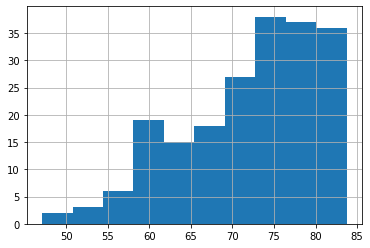

In [10]:
import matplotlib.pyplot as plt

dfomv[2015].hist()

<AxesSubplot:>

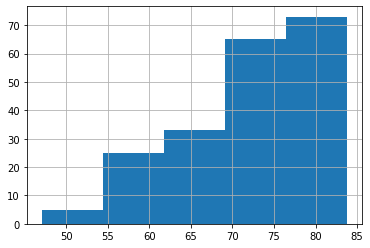

In [11]:
dfomv[2015].hist(bins=5)

Text(0, 0.5, 'frequency')

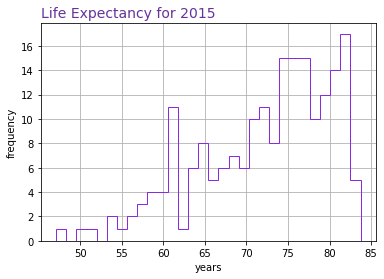

In [27]:
dfomv[2015].hist(bins=30, histtype='step', color='blueviolet')
plt.title('Life Expectancy for 2015', fontsize=14, loc='left', color='rebeccapurple')
plt.xlabel ('years')
plt.ylabel ('frequency')
